In [39]:
class TripartiteIncentive:
    """
    TripartiteIncentive 类用于计算三方（请求者、平台和服务提供商）的最优价格。
    """

    def __init__(self):
        self.platform_cost = 1000.0  # 平台成本 Y，取值为任意实数
        self.cost_coefficient1 = 0.2  # 成本系数 k1，请求者在遭受攻击后损失成本的系数，取值范围 [0.1, 0.3)
        self.cost_coefficient2 = 0.15  # 成本系数 k2，平台服务质量的成本系数，取值为正数
        self.cost_coefficient3 = 0.2  # 成本系数 k3，服务提供商服务质量的成本系数，取值范围 [0.1, 0.3)
        self.sensitivity_beta = 0.75  # 质量相关系数 β，服务提供商服务质量的敏感系数，取值范围 (0.5, 1]
        self.sensitivity_alpha = 0.75  # 质量相关系数 α，平台服务质量的敏感系数，取值范围 (0.5, 1]
        self.requester_evaluation = 5.0  # 用户评价 η，取值范围 (1, 10)
        self.number_of_requesters = 10  # 请求者数量 w，非负整数
        self.proportion_of_fees = 0.1  # 调节参数 θ，平台收取的服务费用比例，取值范围 (0, 1)

    def initialize_parameters(self):
        """初始化参数至一个合理的初始值。"""
        # 平台成本 Y 设定为 1000
        self.set_platform_cost(1000)

        # 成本系数 k1 设定为 0.2
        self.set_cost_coefficient1(0.2)
        
        # 成本系数 k2 设定为 0.15
        self.set_cost_coefficient2(0.15)
        
        # 成本系数 k3 设定为 0.2
        self.set_cost_coefficient3(0.2)
        
        # 质量相关系数 β 设定为 0.75
        self.set_sensitivity_beta(0.75)
        
        # 质量相关系数 α 设定为 0.75
        self.set_sensitivity_alpha(0.75)
        
        # 用户评价 η 设定为 5
        self.set_requester_evaluation(5)
        
        # 请求者数量 w 设定为 10
        self.set_number_of_requesters(10)
        
        # 调节参数 θ 设定为 0.1
        self.set_proportion_of_fees(0.1)

    def set_platform_cost(self, platform_cost):
        """设置平台成本 Y"""
        self.platform_cost = platform_cost

    def get_platform_cost(self):
        """获取平台成本 Y"""
        return self.platform_cost

    def set_cost_coefficient1(self, cost_coefficient1):
        """设置成本系数 k1，表示请求者在遭受攻击后损失成本的系数"""
        self.cost_coefficient1 = cost_coefficient1

    def get_cost_coefficient1(self):
        """获取成本系数 k1"""
        return self.cost_coefficient1

    def set_cost_coefficient2(self, cost_coefficient2):
        """设置成本系数 k2，表示平台服务质量的成本系数"""
        self.cost_coefficient2 = cost_coefficient2

    def get_cost_coefficient2(self):
        """获取成本系数 k2"""
        return self.cost_coefficient2

    def set_cost_coefficient3(self, cost_coefficient3):
        """设置成本系数 k3，表示服务提供商服务质量的成本系数"""
        self.cost_coefficient3 = cost_coefficient3

    def get_cost_coefficient3(self):
        """获取成本系数 k3"""
        return self.cost_coefficient3

    def set_sensitivity_beta(self, sensitivity_beta):
        """设置质量相关系数 β，服务提供商服务质量的敏感系数"""
        self.sensitivity_beta = sensitivity_beta

    def get_sensitivity_beta(self):
        """获取质量相关系数 β"""
        return self.sensitivity_beta

    def set_sensitivity_alpha(self, sensitivity_alpha):
        """设置质量相关系数 α，平台服务质量的敏感系数"""
        self.sensitivity_alpha = sensitivity_alpha

    def get_sensitivity_alpha(self):
        """获取质量相关系数 α"""
        return self.sensitivity_alpha

    def set_requester_evaluation(self, requester_evaluation):
        """设置用户评价 η"""
        self.requester_evaluation = requester_evaluation

    def get_requester_evaluation(self):
        """获取用户评价 η"""
        return self.requester_evaluation

    def set_number_of_requesters(self, number_of_requesters):
        """设置请求者数量 w"""
        self.number_of_requesters = number_of_requesters

    def get_number_of_requesters(self):
        """获取请求者数量 w"""
        return self.number_of_requesters

    def set_proportion_of_fees(self, proportion_of_fees):
        """设置调节参数 θ，平台收取的服务费用比例"""
        self.proportion_of_fees = proportion_of_fees

    def get_proportion_of_fees(self):
        """获取调节参数 θ"""
        return self.proportion_of_fees

    def calculate_optimal_price(self):
        """计算最优价格。"""
        y = self.get_platform_cost()
        k1 = self.get_cost_coefficient1()
        k2 = self.get_cost_coefficient2()
        k3 = self.get_cost_coefficient3()
        beta = self.get_sensitivity_beta()
        alpha = self.get_sensitivity_alpha()
        eta = self.get_requester_evaluation()
        w = self.get_number_of_requesters()
        theta = self.get_proportion_of_fees()
        numerator = -(y * k2 * k3 + abs(y) * beta * eta * k2 * w * (theta - 1) - alpha * eta * k3 * theta * w)
        denominator = 2 * abs(y) * k1 * k2 * k3
        return numerator / denominator
    def calculate_optimal_price_for_platform(self,w=10):
        """计算平台的最优价格。"""
        numerator = self.get_platform_cost() * self.get_cost_coefficient2() * (1 - self.get_proportion_of_fees())
        denominator = self.get_cost_coefficient2() * self.get_number_of_requesters()
        return numerator / denominator if denominator != 0 else 0

    def calculate_optimal_price_for_service_provider(self,w=10):
        """计算服务提供商的最优价格。"""
        numerator = self.get_platform_cost() * self.get_cost_coefficient3() * self.get_sensitivity_beta()
        denominator = self.get_cost_coefficient3() * self.get_number_of_requesters()
        return numerator / denominator if denominator != 0 else 0
    
    def calculate_optimal_service_quality_platform(self,w=10):
        """计算平台的最优服务质量。"""
        alpha = self.get_sensitivity_alpha()
        theta = self.get_proportion_of_fees()
        cost_coefficient2 = self.get_cost_coefficient2()
        platform_cost = self.get_platform_cost()
        
        # 根据平台效用函数推导出最优服务质量
        optimal_quality_platform = self.calculate_optimal_price()*(alpha * w * theta) / (cost_coefficient2 / platform_cost)
        return optimal_quality_platform if optimal_quality_platform >= 0 else 0

    def calculate_optimal_service_quality_service_provider(self,w=10):
        """计算服务提供商的最优服务质量。"""
        beta = self.get_sensitivity_beta()
        theta = self.get_proportion_of_fees()
        cost_coefficient3 = self.get_cost_coefficient3()
        
        # 根据服务提供商效用函数推导出最优服务质量
        optimal_quality_service_provider = self.calculate_optimal_price()*(beta * w * (1-theta)) / cost_coefficient3
        return optimal_quality_service_provider if optimal_quality_service_provider >= 0 else 0
    
    
    def adjust_price_for_crowdsourcing(self, w):
        """根据请求者数量调整最优价格。"""
        numerator = -(self.get_platform_cost() * self.get_cost_coefficient2() * self.get_cost_coefficient3()
                      + abs(self.get_platform_cost()) * self.get_sensitivity_beta() * self.get_requester_evaluation() * self.get_cost_coefficient2() * w * (self.get_proportion_of_fees() - 1)
                      - self.get_sensitivity_alpha() * self.get_requester_evaluation() * self.get_cost_coefficient3() * self.get_proportion_of_fees() * w)
        denominator = 2 * abs(self.get_platform_cost()) * self.get_cost_coefficient1() * self.get_cost_coefficient2() * self.get_cost_coefficient3()
        return numerator / denominator

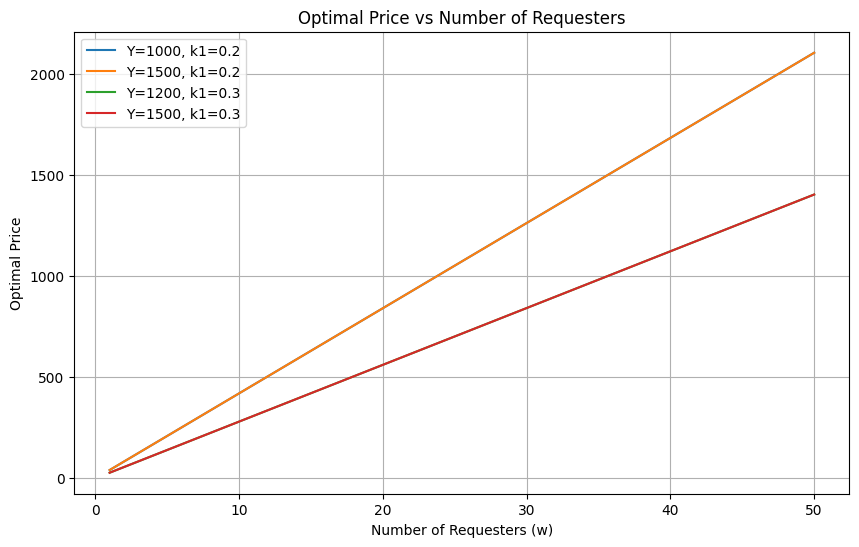

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimal_prices():
    # 创建一个 TripartiteIncentive 实例
    ti = TripartiteIncentive()

    # 定义请求者数量的变化范围
    requesters_range = np.arange(1, 51)  # 从1到50

    # 不同参数组合
    parameters = [
        {'platform_cost': 1000, 'cost_coefficient1': 0.2},
        {'platform_cost': 1500, 'cost_coefficient1': 0.2},
        {'platform_cost': 1200, 'cost_coefficient1': 0.3},
        {'platform_cost': 1500, 'cost_coefficient1': 0.3}
    ]

    plt.figure(figsize=(10, 6))
    for param in parameters:
        # 更新 TripartiteIncentive 实例中的参数
        ti.platform_cost = param['platform_cost']
        ti.cost_coefficient1 = param['cost_coefficient1']

        # 计算每个请求者数量下的最优价格
        prices = [ti.adjust_price_for_crowdsourcing(w) for w in requesters_range]

        # 绘制曲线
        plt.plot(requesters_range, prices, label=f"Y={param['platform_cost']}, k1={param['cost_coefficient1']}")

    plt.title('Optimal Price vs Number of Requesters')
    plt.xlabel('Number of Requesters (w)')
    plt.ylabel('Optimal Price')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_optimal_prices()

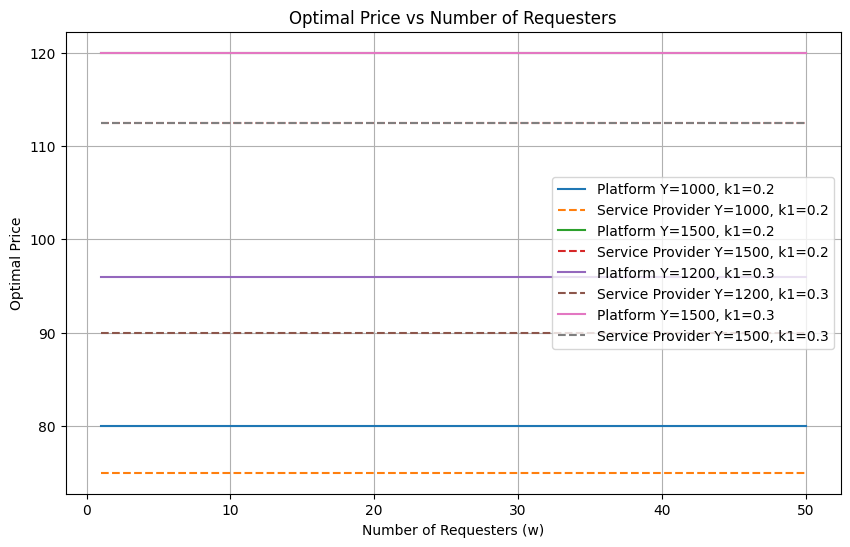

In [41]:
from concurrent.futures import wait


def plot_optimal_prices():
    # 创建一个 TripartiteIncentive 实例
    ti = TripartiteIncentive()

    # 定义请求者数量的变化范围
    requesters_range = np.arange(1, 51)  # 从1到50

    # 不同参数组合
    parameters = [
        {'platform_cost': 1000, 'cost_coefficient1': 0.2},
        {'platform_cost': 1500, 'cost_coefficient1': 0.2},
        {'platform_cost': 1200, 'cost_coefficient1': 0.3},
        {'platform_cost': 1500, 'cost_coefficient1': 0.3}
    ]

    plt.figure(figsize=(10, 6))
    
    for param in parameters:
        # 更新 TripartiteIncentive 实例中的参数
        ti.set_platform_cost(param['platform_cost'])
        ti.set_cost_coefficient1(param['cost_coefficient1'])

        # 初始化其他参数
        ti.set_cost_coefficient2(0.15)
        ti.set_cost_coefficient3(0.2)
        ti.set_sensitivity_beta(0.75)
        ti.set_sensitivity_alpha(0.75)
        ti.set_requester_evaluation(5.0)
        ti.set_proportion_of_fees(0.2)

        # 计算每个请求者数量下的最优价格
        platform_prices = [ti.calculate_optimal_price_for_platform(w) for w in requesters_range]
        service_provider_prices = [ti.calculate_optimal_price_for_service_provider(w) for w in requesters_range]

        # 绘制曲线
        plt.plot(requesters_range, platform_prices, label=f"Platform Y={param['platform_cost']}, k1={param['cost_coefficient1']}")
        plt.plot(requesters_range, service_provider_prices, linestyle='--', label=f"Service Provider Y={param['platform_cost']}, k1={param['cost_coefficient1']}")

    plt.title('Optimal Price vs Number of Requesters')
    plt.xlabel('Number of Requesters (w)')
    plt.ylabel('Optimal Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_optimal_prices()

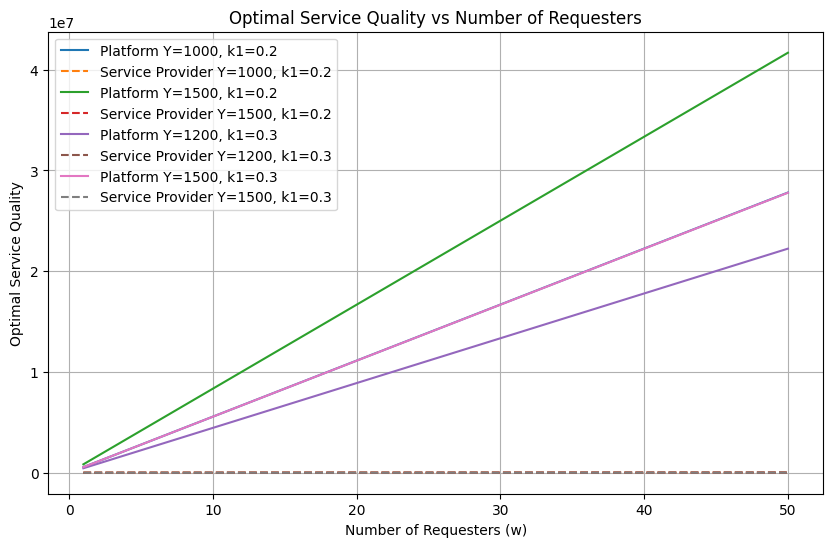

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimal_qualities():
    # 创建一个 TripartiteIncentive 实例
    ti = TripartiteIncentive()

    # 定义请求者数量的变化范围
    requesters_range = np.arange(1, 51)  # 从1到50

    # 不同参数组合
    parameters = [
        {'platform_cost': 1000, 'cost_coefficient1': 0.2},
        {'platform_cost': 1500, 'cost_coefficient1': 0.2},
        {'platform_cost': 1200, 'cost_coefficient1': 0.3},
        {'platform_cost': 1500, 'cost_coefficient1': 0.3}
    ]

    plt.figure(figsize=(10, 6))
    
    for param in parameters:
        # 更新 TripartiteIncentive 实例中的参数
        ti.set_platform_cost(param['platform_cost'])
        ti.set_cost_coefficient1(param['cost_coefficient1'])

        # 初始化其他参数
        ti.set_cost_coefficient2(0.15)
        ti.set_cost_coefficient3(0.2)
        ti.set_sensitivity_beta(0.75)
        ti.set_sensitivity_alpha(0.75)
        ti.set_requester_evaluation(5.0)
        ti.set_proportion_of_fees(0.6)

        # 计算每个请求者数量下的最优服务质量
        platform_qualities = [ti.calculate_optimal_service_quality_platform(w) for w in requesters_range]
        service_provider_qualities = [ti.calculate_optimal_service_quality_service_provider(w) for w in requesters_range]

        # 绘制曲线
        plt.plot(requesters_range, platform_qualities, label=f"Platform Y={param['platform_cost']}, k1={param['cost_coefficient1']}")
        plt.plot(requesters_range, service_provider_qualities, linestyle='--', label=f"Service Provider Y={param['platform_cost']}, k1={param['cost_coefficient1']}")

    plt.title('Optimal Service Quality vs Number of Requesters')
    plt.xlabel('Number of Requesters (w)')
    plt.ylabel('Optimal Service Quality')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_optimal_qualities()

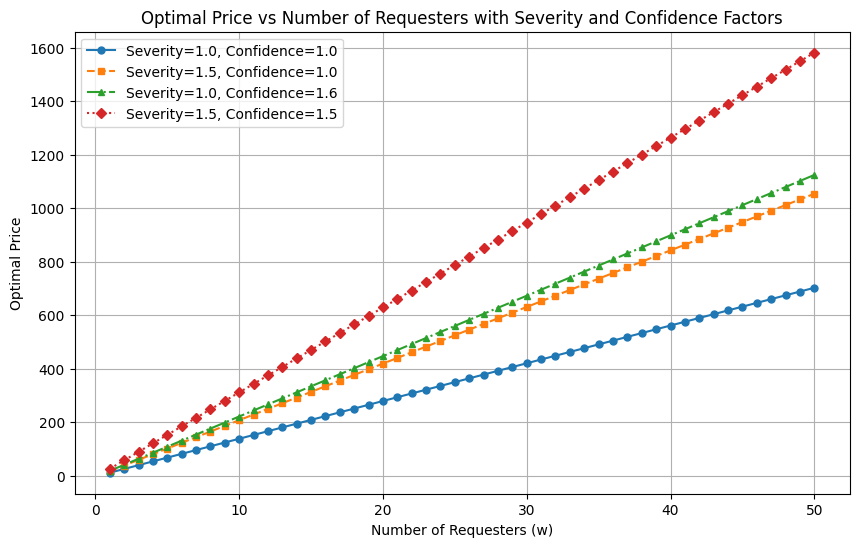

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class TripartiteIncentive:
    """
    TripartiteIncentive 类用于计算三方（请求者、平台和服务提供商）的最优价格。
    """

    def __init__(self):
        self.platform_cost = 1000.0  # 平台成本 Y
        self.cost_coefficient1 = 0.2  # 成本系数 k1
        self.cost_coefficient2 = 0.15  # 成本系数 k2
        self.cost_coefficient3 = 0.2  # 成本系数 k3
        self.sensitivity_beta = 0.75  # 质量相关系数 β
        self.sensitivity_alpha = 0.75  # 质量相关系数 α
        self.requester_evaluation = 5.0  # 用户评价 η
        self.number_of_requesters = 10  # 请求者数量 w
        self.proportion_of_fees = 0.7  # 调节参数 θ (平台服务费比例)
        self.severity_factor = 1.0  # 威胁严重程度因子
        self.confidence_factor = 1.0  # 威胁置信度因子

    def adjust_price_for_crowdsourcing(self, w):
        """根据请求者数量调整最优价格，并考虑威胁严重程度和置信度。"""
        numerator = -(self.platform_cost * self.cost_coefficient2 * self.cost_coefficient3
                      + abs(self.platform_cost) * self.sensitivity_beta * self.requester_evaluation * self.cost_coefficient2 * w * (self.proportion_of_fees - 1)
                      - self.sensitivity_alpha * self.requester_evaluation * self.cost_coefficient3 * self.proportion_of_fees * w)
        denominator = 2 * abs(self.platform_cost) * self.cost_coefficient1 * self.cost_coefficient2 * self.cost_coefficient3
        base_price = numerator / denominator
        adjusted_price = base_price * self.severity_factor * self.confidence_factor
        return adjusted_price

def plot_optimal_prices_with_factors():
    # 创建一个 TripartiteIncentive 实例
    ti = TripartiteIncentive()

    # 定义请求者数量的变化范围
    requesters_range = np.arange(1, 51)  # 从1到50

    # 不同严重程度和置信度组合
    scenarios = [
        {'severity_factor': 1.0, 'confidence_factor': 1.0},
        {'severity_factor': 1.5, 'confidence_factor': 1.0},
        {'severity_factor': 1.0, 'confidence_factor': 1.6},
        {'severity_factor': 1.5, 'confidence_factor': 1.5}
    ]

    plt.figure(figsize=(10, 6))
    
    for idx, scenario in enumerate(scenarios):
        # 更新 TripartiteIncentive 实例中的参数
        ti.severity_factor = scenario['severity_factor']
        ti.confidence_factor = scenario['confidence_factor']

        # 计算每个请求者数量下的最优价格
        prices = [ti.adjust_price_for_crowdsourcing(w) for w in requesters_range]

        # 绘制曲线
        linestyle = ['-', '--', '-.', ':'][idx % len(['-', '--', '-.', ':'])]
        marker = ['o', 's', '^', 'D'][idx % len(['o', 's', '^', 'D'])]
        plt.plot(requesters_range, prices, linestyle=linestyle, marker=marker, markersize=5, label=f"Severity={scenario['severity_factor']}, Confidence={scenario['confidence_factor']}")

    plt.title('Optimal Price vs Number of Requesters with Severity and Confidence Factors')
    plt.xlabel('Number of Requesters (w)')
    plt.ylabel('Optimal Price')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    plot_optimal_prices_with_factors()